# Ejercicio 01. Datos en Astrophysics

## A. Descargando datos del SDSS
Escriba una busqueda en SQL que permita encontrar en el SDSS (DS17), utilizando las tablas PhotoObj y SpecObj, los objetos localizados en la región con ascención recta entre 140.9 y 141.1, que tengan un brillo en la banda g mayor a 18.0 y con un corrimiento al rojo (SpecObj) mayor que 0.1. Realice la conexión entre las dos tablas a través de objid (PhotoObj) y bestobjid (SpecObj) y obtenga las siguientes características:
- Object ID (PhotoObj)
- ra
- dec
- las 5 mahgnitudes u,g,r,i,z
- specobjid (SpecObj)
- z o redhsift (SepcObj)

Descargue los resultados en un archivo de formato .csv.

### Codigo SQL para obtener los datos astrofísicos.
```
SELECT
    p.objID, s.specObjID, s.class, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, s.z AS redshift
FROM PhotoObj AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE
    p.ra BETWEEN 140.9 AND 141.1 AND
    p.g < 20.0 AND
    s.z > 0.1

```


## B. Análisis de los Datos obtenidos
1. Escriba un código que lea el archivo de datos descargado y determine el número de objetos obtenidos. Verifique que no existen objetos de la clase espectral 'STAR' y determine cuantos objetos son 'GALAXY' y cuantos 'QSO'. Verifique que no existen datos faltantes.

2. Realice 5 gráficas mostrando el redshift (eje vertical) vs. cada una de las magnitudes en las bandas u,g,r,i,z (eje horizontal). En cada una de ellas identifique con color rojo las galaxias y con azul los quasars.

3. Identifique y presente la información de la galaxia con el redshift mas alto y del quasar con el redshift mas pequeño.

In [144]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ##seaborn: statistical data visualization https://seaborn.pydata.org/

from google.colab import drive #Importar los datos de csv a colab
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
#Ruta de Laura
data = pd.read_csv('/content/drive/MyDrive/2022-2/Astrofísica computacional :3/Taller 1/Astrophysics Data.csv')
data

,objID,specObjID,class,ra,dec,u,g,r,i,z,redshift
0,"1,23764872121365E+018","1,41246794634649E+019",QSO,141.018187,-0.118854,19.75194,19.09415,19.02113,18.95458,18.70845,2.441179
1,"1,23764872121365E+018","5,33730465467623E+017",GALAXY,141.017809,-0.154488,21.14422,19.13279,17.74638,17.23632,16.86498,0.229487
2,"1,23765079514402E+018","5,33731839857158E+017",GALAXY,140.961842,-0.773332,20.46519,18.64065,17.60354,17.15246,16.78031,0.136540
3,"1,23765080479983E+018","4,25711504691065E+018",GALAXY,141.043523,-1.720748,21.56412,19.84135,18.29709,17.72863,17.33801,0.349925
4,"1,23765119028737E+018","5,0782212168302E+017",GALAXY,141.057197,56.136070,19.20185,17.54833,16.44561,15.95011,15.60817,0.180216
...,...,...,...,...,...,...,...,...,...,...,...
760,"1,23767096484902E+018","5,97647141934074E+018",GALAXY,140.969585,14.290432,20.17719,18.13726,17.04081,16.57171,16.21370,0.141096
761,"1,23767126066509E+018","5,97636806524773E+018",QSO,140.961900,12.200351,19.83543,19.22008,19.36174,19.30280,19.05299,2.336595
762,"1,23767126120196E+018","2,90160603157236E+018",QSO,140.921452,12.642933,19.28414,19.13869,18.81568,18.84810,18.93868,1.205149
763,"1,23767446041572E+018","6,39579629501311E+017",GALAXY,140.940428,2.938494,20.81933,18.63053,17.38714,16.81693,16.34784,0.146845


In [ ]:
##Ruta de Pater
data=pd.read_csv('/content/drive/MyDrive/CosasPater/UNAL/202202SeptimoSemestre/AstrofisicaCom/Taller1/AstrophysicsData.csv')
data

,objID,specObjID,class,ra,dec,u,g,r,i,z,redshift
0,"1,23764872121365E+018","1,41246794634649E+019",QSO,141.018187,-0.118854,19.75194,19.09415,19.02113,18.95458,18.70845,2.441179
1,"1,23764872121365E+018","5,33730465467623E+017",GALAXY,141.017809,-0.154488,21.14422,19.13279,17.74638,17.23632,16.86498,0.229487
2,"1,23765079514402E+018","5,33731839857158E+017",GALAXY,140.961842,-0.773332,20.46519,18.64065,17.60354,17.15246,16.78031,0.136540
3,"1,23765080479983E+018","4,25711504691065E+018",GALAXY,141.043523,-1.720748,21.56412,19.84135,18.29709,17.72863,17.33801,0.349925
4,"1,23765119028737E+018","5,0782212168302E+017",GALAXY,141.057197,56.136070,19.20185,17.54833,16.44561,15.95011,15.60817,0.180216
...,...,...,...,...,...,...,...,...,...,...,...
760,"1,23767096484902E+018","5,97647141934074E+018",GALAXY,140.969585,14.290432,20.17719,18.13726,17.04081,16.57171,16.21370,0.141096
761,"1,23767126066509E+018","5,97636806524773E+018",QSO,140.961900,12.200351,19.83543,19.22008,19.36174,19.30280,19.05299,2.336595
762,"1,23767126120196E+018","2,90160603157236E+018",QSO,140.921452,12.642933,19.28414,19.13869,18.81568,18.84810,18.93868,1.205149
763,"1,23767446041572E+018","6,39579629501311E+017",GALAXY,140.940428,2.938494,20.81933,18.63053,17.38714,16.81693,16.34784,0.146845


In [146]:
data.describe() #Descripcion de cada columna. Aquí se puede notar que se obtienen 765 objetos

,ra,dec,u,g,r,i,z,redshift
count,765.000000,765.000000,765.000000,765.000000,765.00000,765.000000,765.000000,765.000000
mean,140.998460,29.312568,204.585381,139.003352,158.18855,221.788495,109.436987,0.519378
std,0.059771,19.391247,1923.567466,1484.967660,1579.62573,1874.981238,1276.123057,0.725489
min,140.900106,-2.546645,16.281080,16.370370,15.49174,15.189280,14.537030,0.100388
25%,140.943686,12.680223,19.603870,18.267970,17.35898,16.891920,16.562310,0.137034
50%,140.998976,28.552908,20.224510,18.764570,17.70423,17.252860,16.913410,0.187749
75%,141.051383,44.599363,20.952320,19.309290,18.37480,18.110360,17.765460,0.317053
max,141.099921,67.692245,22128.000000,19424.000000,18808.00000,18747.000000,19785.000000,3.512214


In [147]:
###Función para contar elementos en las tablas
def contar(Lis,Nom):
  i=0
  for j in list(range(0,len(Lis))):
      if Nom == Lis[j]:
        i=i+1
  return i
###Conteo de estrellas, galaxias y cuásar
Class=np.array(data['class']) #Se crea un array de la columna class
Star=contar(Class,'STAR')
Galaxy=contar(Class,'GALAXY')
Qso=contar(Class,'QSO')
print('En los datos tenemos',Star,'estrellas,',Galaxy,'Galaxias y',Qso,'Cuásares, con un total de',Galaxy+Qso+Star,'objetos.')

En los datos tenemos 0 estrellas, 576 Galaxias y 189 Cuásares, con un total de 765 objetos.


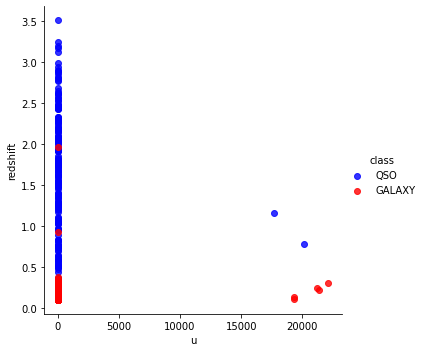

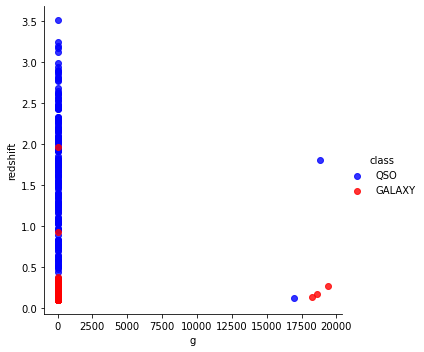

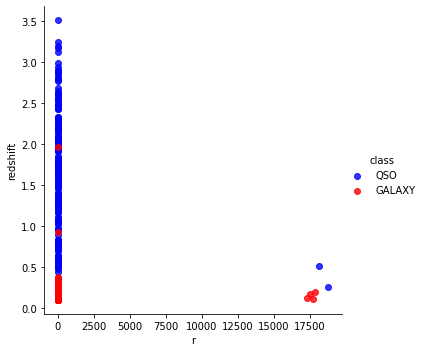

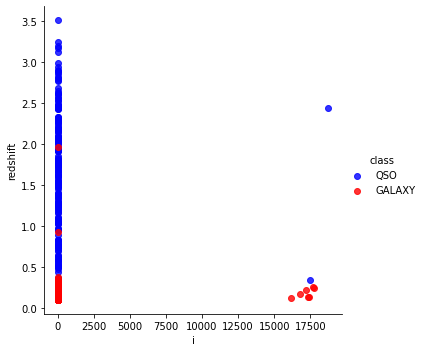

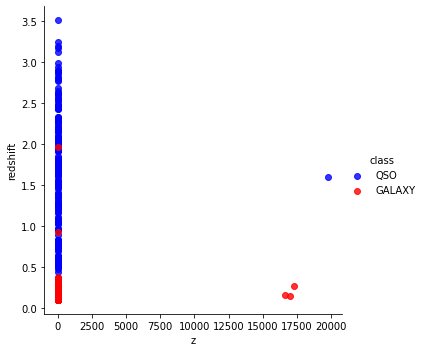

In [ ]:
#Primer intento de graficar el redshift respecto a cada filtro 
figu= sns.lmplot(x = 'u',y = 'redshift', data=data,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figu)
figg= sns.lmplot(x = 'g',y = 'redshift', data=data,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figg)
figr= sns.lmplot(x = 'r',y = 'redshift', data=data,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figr)
figi= sns.lmplot(x = 'i',y = 'redshift', data=data,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figi)
figz= sns.lmplot(x = 'z',y = 'redshift', data=data,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figz)

In [148]:
misslis = np.array(data)
######Correción de los datos##########
for i in list(range(0,len(misslis))):
  for j in list(range(5,len(misslis[i])-1)):
    if misslis[i,j]>10000:
      misslis[i,j]=misslis[i,j]/1000  #Al graficar los datos sin corregir, se encuentran datos átipos rondando el rango de [17000,20000], por eso se decide /1000

misslis_panda=pd.DataFrame(misslis) #Se crea la nueva tabla de datos
misslis_panda.columns=['objID',	'specObjID',	'class',	'ra',	'dec',	'u',	'g',	'r',	'i',	'z',	'redshift']
misslis_panda.to_csv('data.csv', index=False)


In [149]:
########Ver datos faltantes#########
mrlis=[]
for i in list(range(0,len(misslis))):
  for j in list(range(0,len(misslis[i]))):
    mrlis.append(misslis[i,j])

Faltantes = contar(mrlis,'--')
if Faltantes == 0:
  print("No hay datos faltantes.")
else: 
  print('En los datos hay',Faltantes,'datos faltantes')

No hay datos faltantes.


In [150]:
len(mrlis)==11*765 #Corroborar que el array fuera correcto

True

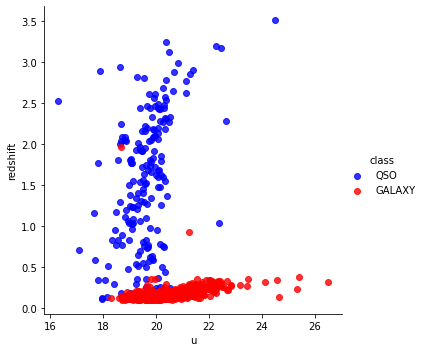

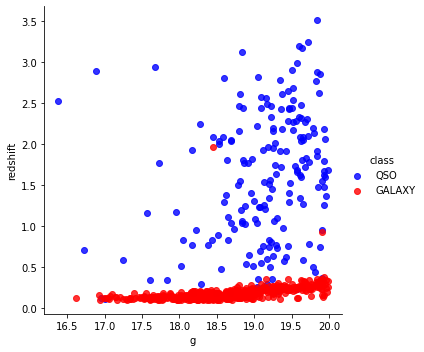

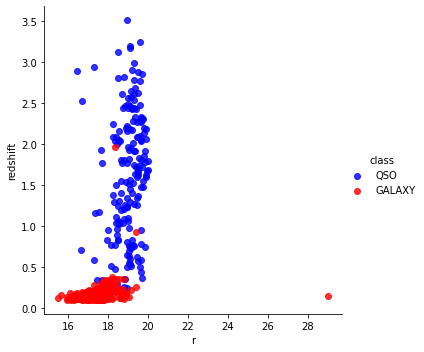

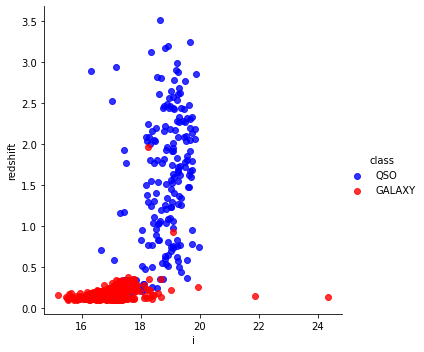

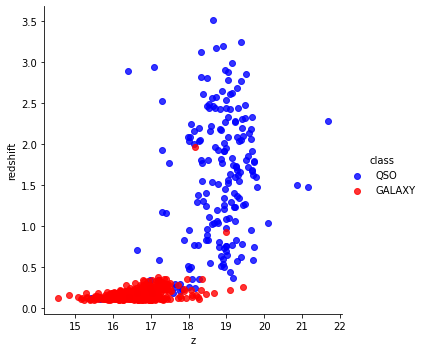

In [ ]:
#Segundo intento de graficar con los datos corregidos y diferenciando entre galaxias y cuásares
figu= sns.lmplot(x = 'u',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figu)
figg= sns.lmplot(x = 'g',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figg)
figr= sns.lmplot(x = 'r',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figr)
figi= sns.lmplot(x = 'i',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figi)
figz= sns.lmplot(x = 'z',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(figz)

In [ ]:
#Encontrar el redshift más alto entre galaxias
Galaxias = data.groupby(['class']).get_group('GALAXY') #Subgrupo de solo galaxias de los datos obtenidos
Gal_max = Galaxias['redshift'].max() #Encontrar el valor máx del redshift en el subgrupo
print("El redshift más alto entre las galaxias es z =",Gal_max)
Galaxias.groupby(['redshift']).get_group(1.963634) #Muestra los datos de la galaxia seleccionada

El redshift más alto entre las galaxias es z = 1.963634


,objID,specObjID,class,ra,dec,u,g,r,i,z,redshift
595,"1,23765079460715E+018","1,41244518645579E+019",GALAXY,141.002295,-1.162619,18.65775,18.4443,18.35764,18.23983,18.17272,1.963634


In [ ]:
#Encontrar el redshift más bajo entre cuásares
QSO = data.groupby(['class']).get_group('QSO') #Subgrupo de solo cuásares de los datos obtenidos
QSO_min = QSO['redshift'].min() #Encontrar el valor mín del redshift en el subgrupo
print("El redshift más bajo entre los cuásares es z =",QSO_min)
QSO.groupby(['redshift']).get_group(0.1065004) #Muestra los datos del cuásar seleccionado

El redshift más bajo entre los cuásares es z = 0.1065004


,objID,specObjID,class,ra,dec,u,g,r,i,z,redshift
427,"1,2376607659165E+018","1,4345075822397E+018",QSO,141.087865,36.893822,17.94765,17.00332,16.31914,15.88601,15.66677,0.1065


In [ ]:
#método alternativo para encontrar la cantidad de estrellas, galaxias y cuásares.
Lt=np.array(data)
Lg=np.array(Galaxias)
Lqso=np.array(QSO)
print('En los datos tenemos',len(Lt)-(len(Lg)+len(Lqso)),'estrellas,',len(Lg),'Galaxias y',len(Lqso),'Cuásares, con un total de',len(Lt),'objetos.')

En los datos tenemos 0 estrellas, 576 Galaxias y 189 Cuásares, con un total de 765 objetos.


## C. Índices de Color
1. Defina columnas en el dataframe con los índices de color u-g, g-i, r-i e i-z para cada uno de los objetos.

2. Realice 4 gráficas mostrando el redshift (eje vertical) vs. cada uno de los índices de color, identificando con color rojo las galaxias y con azul los quasars.

3. Realice una gráfica mostrando el índice de color r-i (eje vertical) vs. índice de color u-g (eje horizontal) e indicando el valor de redshift para cada objeto con una escala de color. Puede identificar algún(os) objeto(s) ailslado(s) de la tendencia? Que interpretación daría para este comportamiento?

In [ ]:
#Definición de columnas para los índices de color 
misslis_panda['u-g']=misslis_panda['u']-misslis_panda['g']
misslis_panda['g-i']=misslis_panda['g']-misslis_panda['i']
misslis_panda['r-i']=misslis_panda['r']-misslis_panda['i']
misslis_panda['i-z']=misslis_panda['i']-misslis_panda['z']
misslis_panda

,objID,specObjID,class,ra,dec,u,g,r,i,z,redshift,u-g,g-i,r-i,i-z
0,"1,23764872121365E+018","1,41246794634649E+019",QSO,141.018187,-0.118854,19.75194,19.09415,19.02113,18.95458,18.70845,2.441179,0.65779,0.13957,0.06655,0.24613
1,"1,23764872121365E+018","5,33730465467623E+017",GALAXY,141.017809,-0.154488,21.14422,19.13279,17.74638,17.23632,16.86498,0.229487,2.01143,1.89647,0.51006,0.37134
2,"1,23765079514402E+018","5,33731839857158E+017",GALAXY,140.961842,-0.773332,20.46519,18.64065,17.60354,17.15246,16.78031,0.13654,1.82454,1.48819,0.45108,0.37215
3,"1,23765080479983E+018","4,25711504691065E+018",GALAXY,141.043523,-1.720748,21.56412,19.84135,18.29709,17.72863,17.33801,0.349925,1.72277,2.11272,0.56846,0.39062
4,"1,23765119028737E+018","5,0782212168302E+017",GALAXY,141.057197,56.13607,19.20185,17.54833,16.44561,15.95011,15.60817,0.180216,1.65352,1.59822,0.4955,0.34194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,"1,23767096484902E+018","5,97647141934074E+018",GALAXY,140.969585,14.290432,20.17719,18.13726,17.04081,16.57171,16.2137,0.141096,2.03993,1.56555,0.4691,0.35801
761,"1,23767126066509E+018","5,97636806524773E+018",QSO,140.9619,12.200351,19.83543,19.22008,19.36174,19.3028,19.05299,2.336595,0.61535,-0.08272,0.05894,0.24981
762,"1,23767126120196E+018","2,90160603157236E+018",QSO,140.921452,12.642933,19.28414,19.13869,18.81568,18.8481,18.93868,1.205149,0.14545,0.29059,-0.03242,-0.09058
763,"1,23767446041572E+018","6,39579629501311E+017",GALAXY,140.940428,2.938494,20.81933,18.63053,17.38714,16.81693,16.34784,0.146845,2.1888,1.8136,0.57021,0.46909


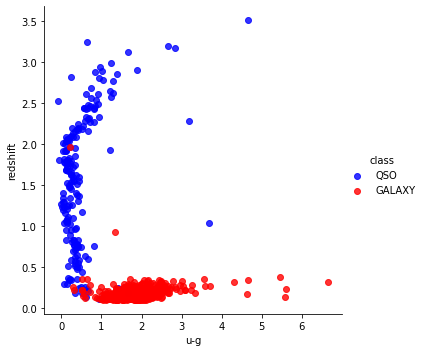

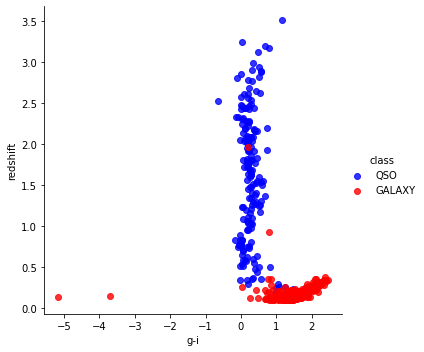

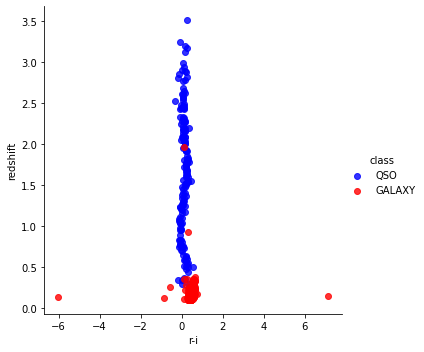

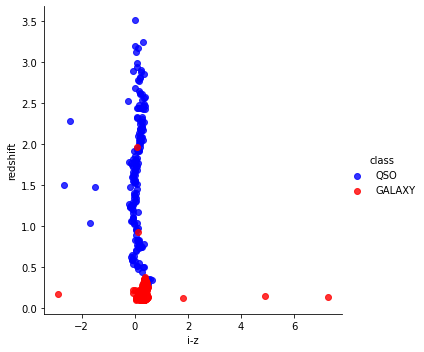

In [ ]:
#Diagramas de redshift en función de los índices de color
fig_ug= sns.lmplot(x = 'u-g',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(fig_ug)
fig_gi= sns.lmplot(x = 'g-i',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(fig_gi)
fig_ri= sns.lmplot(x = 'r-i',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(fig_ri)
fig_iz= sns.lmplot(x = 'i-z',y = 'redshift', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(fig_iz)

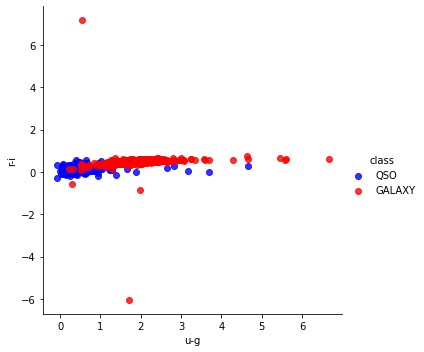

In [ ]:
#Diagrama color-color con diferencia entre galaxias y cuásares
CC_1= sns.lmplot(x = 'u-g',y = 'r-i', data=misslis_panda,hue='class', palette={'GALAXY':'red','QSO':'blue'},fit_reg=False)
plt.show(CC_1)

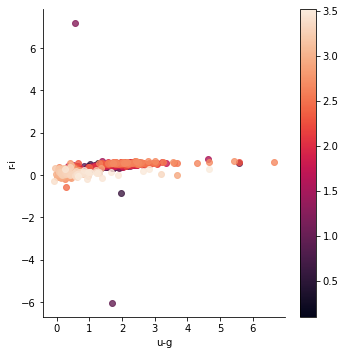

In [143]:
#Diagrama color - color resaltando cada redshift con el uso de un mapa de color
CC_2= sns.lmplot(x = 'u-g',y = 'r-i', data = misslis_panda, hue='redshift', palette='rocket', legend=False, ci=None)
norm = plt.Normalize(misslis_panda['redshift'].min(),misslis_panda['redshift'].max())
sm = plt.cm.ScalarMappable(cmap = 'rocket', norm=norm)
sm.set_array([])

CC_2.figure.colorbar(sm)

plt.show(CC_2)